<!--NAVIGATION-->
< [5_Geoprocessing_Python_GDAL](6_Geoprocessing_Python_GDAL.ipynb) | [Contents](Index.ipynb) | [6_Hazard_Mapping Python_GDAL](6_Hazard_Mapping_Python_GDAL.ipynb) >

<img align="left" style="width: 350px;" src="figures/logo.png"/>
----------------------------------------------------------------------------------------------------------------------
# Bologna Training Course 23 – 27 January 2017

# Hydrological and Flood Risk Geo-processing with Open Source (Python/GDAL) 
<img  align="left" style="width: 300px;" src="figures/logo2011.jpg"/>

----------------------------------------------------------------------------------------------------------------------
## Stefano Bagli and Paolo Mazzoli - [GECOsistema srl ](www.gecosistema.com)
----------------------------------------------------------------------------------------------------------------------

# 5 Geoprocessing with Python/GDAL

## 5.1 What is Geo-processing

- Geoprocessing is any GIS operation used to manipulate data.

- Geoprocessing is a general term for manipulating spatial data, whether raster or vector.

- A typical geoprocessing operation takes an input dataset, performs an operation on that dataset, and returns the result of the operation as an output dataset, also referred to as derived data. 

<img src="figures/geoprocessing.png">

- Common geoprocessing operations are geographic feature overlay, feature selection and analysis, topology processing, and data conversion. Geoprocessing allows you to define, manage, and analyze geographic information used to make decisions

- We use a geopreocessing approach when every day we select the best pathway to reach a destination, taking into account not only the Euclidean distance (shortest path) but also cost/efforts related to moving from A to B, such as traffic, elevation, pollution.

- First case in history of use of geoprocessing/spatial analysis was related to colera by Jhon Snow in London

<img src="figures/snow.png">

Raster-based flood risk assessment is usually performed recurring to geoprocessing and map algebra.

**GIS operation in Flood-Risk Assessment:**
- pre-processing input for hydrodynamic models (fully 2D- TELEMAC/MIKE21 or raster based LISFLOOD)
    - DEM pre-processing
    - Spatial Hydrology DEM processing (Watershed delineation, river network, flow accumulation and direction)
    - Zonal statistics with land-used or land-cover
    - Conversion vector to raster and viceversa
- post-processing
    - extracting and map results from hydrodynamic models
- hazard and risk mapping
    - Vulnerability and damage assessment raster computation
    - Raster-based risk mapping
    - Spatial analysis between flooded areas and receptors

## 5.2 Geoprocessing Libraries
- Collections of reusable bits of code (such as DLLs)
- Libraries in Python are called modules
- Modules can contain many things, including functions, constants and classes
- You can easily create your own Python modules (unlike DLLs, which require a lot of know-how and a compiler)

### 5.2.1 GDAL-OGR – Geospatial Data Abstraction Library

- GDAL is a translator library for raster and vector geospatial data formats.
- GDAL is the open source Swiss Army knife of raster and vector formats.
 - GDAL for Raster Data
 - OGR for Vector Data

It presents a single raster abstract data model and vector abstract data model for all supported formats.

It is implemented in C/C++, so it is highly performing, and it provides Python bindings.

Installing this library may not be a trivial task, specially for those who are not very familiar with the process of installing Python dependencies. In any case, the GDAL site has got detailed instructions which are summarized in a README file in the code repository related to this post.

- Raster data access
- Used by commercial software like ArcGIS
- Really C++ library, but Python bindings exist
- OGR Simple Features Library – Vector data access
- Part of GDAL

### 5.2.2 Related Modules

- GDAL: http://www.gdal.org/, gdal.py, gdalconst.py
- OGR: http://www.gdal.org/ogr/, ogr.py
- NUMPY: numdoc.pdf, http://numpy.sourceforge.net/numdoc/HTML/numdoc.htm

### 5.3.1 Importing GDAL-Python Modules

- Need to import a module before using it

In [1]:
import platform
platform.python_version()

'2.7.12'

In [2]:
import gdal, gdalconst
workdir='data/Chap_5/'
filename='eu_dem_v11_E40N20_Turim.tif'
dataset = gdal.Open(workdir+filename, gdalconst.GA_Update)

We can also import the entire module so that we don’t have to qualify members with the module name, like this:

In [3]:
from gdal import *
from gdalconst import *
workdir='data/Chap_5/'
filename='eu_dem_v11_E40N20_Turim.tif'
dataset = Open(workdir+filename, GA_Update)

Or we can import a subset of a module like this:

In [4]:
from gdal import Open
from gdalconst import GA_Update 
dataset = Open(workdir+filename, GA_Update)

However, sometimes it’s nice to mix import methods. In this example, we force ourselves to qualify any methods in the gdal module, but we don’t have to qualify constants from the gdalconst module (they all start with GA_ anyway, so are probably unique).

In [5]:
import gdal
from gdalconst import *
dataset = gdal.Open(workdir+filename, GA_Update)

# 5.3 Reading and Writing Raster Data with GDAL

Raster Data = geografic data-set representing a continuos variable (eg. Wind or Temperature Field)
- Digital Elevation Model
- Map of Temperature
- Satellite data
- Distance from roads
- Soil Moisture

**Raster Data = Array of Data - Numpy Array**


Numerous different file formats exist for raster data, and GDAL is an extremely popular and robust library for reading and writing many of them. The GDAL library is open source, but has a permissive license, so even many commercial software packages use it.

The GDAL library is well known for its ability to read and write so many different formats, but it also contains a few data processing functions such as proximity analysis.

## 5.3.1 Raster data as Numpy Array
Raster Data = Array of Data

Python module called NumPy that’s designed for processing large arrays of data, and you can use GDAL to read data directly into NumPy arrays. After manipulating the data however you need, using NumPy or another module that works with these arrays, you can write the array back out to disk as a raster dataset.

## 5.3.2 Raster formats


GeoTiff most used


In [1]:
import IPython
url = 'http://www.gdal.org/formats_list.html'
iframe = '<iframe src=' + url + ' width=900 height=500></iframe>'
IPython.display.HTML(iframe)

## 5.3.3 Spatial origin

The geotransform is important because it provides the origin coordinates and pixel sizes, along with rotation values if the image isn’t situated so the top faces north. As you learned earlier, the origin and pixel size are extremely important when it comes to placing the dataset in the correct spatial location.
<img style="padding-right:10px;" src="figures/gdal_1.png">

## 5.3.4 Gdal structure
The basic structure of a GDAL dataset is shown in figure and matches what you’ve learned about raster datasets in general. Each dataset contains one or more bands, which in turn contain the pixel data and possibly overviews. The georeferencing information is contained in the dataset because all of the bands use the same infor- mation for this.

<img style="padding-right:10px;" src="figures/gdal_2.png">

## 5.3.5 GDAL data type
<img  style="padding-right:10px;" src="figures/gdal_3.png">

## 5.3.6 Read Raster DEM as Numpy Array

In [3]:
import matplotlib.pyplot as plt
from osgeo import gdal
import gdalconst
import numpy
import os, glob
import sys

workdir='data/Chap_5/'
filename='eu_dem_v11_E40N20_Turim.tif'
#filename='out.tif'
dataset = gdal.Open(workdir+filename,gdalconst.GA_ReadOnly) # open the dataset in read mode
if dataset is None:
    print "Could not open file"
    sys.exit(1)

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


### Getting Image Dimension

In [4]:
bands=dataset.RasterCount
print bands

# option 1 using GDAL functions
cols = dataset.RasterXSize # read number of colums
rows = dataset.RasterYSize # read number of rows
print cols
print rows

1
500
500


### Getting Geo-reference Info
GeoTransforms are lists of information used to georeference an image

In [5]:
geotransform = dataset.GetGeoTransform() # read the geotransform (origin coordinates and pixel sizes, along with rotation values)
projection = dataset.GetProjection() # read the proj info


#### Geotransform
The geotransform is a tuple containing the six values
<img align="left" style="padding-right:10px;" src="figures/gdal_6.png">

In [6]:
print geotransform

print 'X0='+str(geotransform[0])
print 'dx='+str(geotransform[1])
print 'rotx='+str(geotransform[2])
print 'Y0='+str(geotransform[3])
print 'roty='+str(geotransform[4])
print 'dy='+str(geotransform[5])



(4120000.0, 100.0, 0.0, 2460000.0, 0.0, -100.0)
X0=4120000.0
dx=100.0
rotx=0.0
Y0=2460000.0
roty=0.0
dy=-100.0


### Raster Extent

In [8]:
extent=(geotransform[0],geotransform[0]+cols*geotransform[1],geotransform[3]+rows*geotransform[5],geotransform[3])
print extent

(4120000.0, 4170000.0, 2410000.0, 2460000.0)


### Getting  Projection
To work with a spatial reference system, you need a SpatialReference object that represents it.
- WKT (Well Known Text) format
- PROJ.4 strings

http://www.spatialreference.org

In [2]:
import IPython
url = 'http://www.spatialreference.org'
iframe = '<iframe src=' + url + ' width=900 height=500></iframe>'
IPython.display.HTML(iframe)

In [10]:
print projection

PROJCS["ETRS89_ETRS_LAEA",GEOGCS["GCS_ETRS_1989",DATUM["unknown",SPHEROID["unnamed",6378137,298.2572221010042,AUTHORITY["EPSG","0"]],AUTHORITY["EPSG","6258"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433]],PROJECTION["Lambert_Azimuthal_Equal_Area"],PARAMETER["latitude_of_center",52],PARAMETER["longitude_of_center",10],PARAMETER["false_easting",4321000],PARAMETER["false_northing",3210000],UNIT["metre",1,AUTHORITY["EPSG","9001"]]]


### Getting Pixels Values
- First get the Band object by passing the band index (1-based) to the Dataset’s GetRasterBand(index) method

In [11]:
band = dataset.GetRasterBand(1) # get the first band (Remember that band indices start at 1 instead of 0 )
print band

<osgeo.gdal.Band; proxy of <Swig Object of type 'GDALRasterBandShadow *' at 0x1067dc900> >


Now read the data into a 2D Numeric array using the Band’s ReadAsArray(xoff, yoff, xsize, ysize) method

In [12]:

wdata = band.ReadAsArray(0, 0, cols, rows).astype("float32") #read all pixels as array

# option 2 using numoy array functions
print("dem ndim: ", wdata.ndim) # array dim - raster is a 2D
print("dem shape:", wdata.shape) # shape returns number of row and cols
print("dem size: ", wdata.size) # size is the total number of pixels/cells

('dem ndim: ', 2)
('dem shape:', (500, 500))
('dem size: ', 250000)


### Extract specifc pixel value
Ex. read pixel value of colum 95th and 43 row

In [10]:
value=wdata[42,94]

### Closing the Dataset
Once again we need to make sure we close the Dataset so we don’t waste memory

In [14]:
dataset = None

## 5.4.7 Visualize Raster data
Matplotlib is a general-purpose plotting library for Python and can be used for any kind of graphic you can think up. This module is extensive, and like NumPy and SciPy, entire books have been written on it. 
matplotlib gallery at http://matplotlib.org/gallery.html

http://wiki.scipy.org/Cookbook/Matplotlib/Show_colormaps

<img align="left" style="padding-right:10px;" src="figures/colormap.png">

<IPython.core.display.Javascript object>


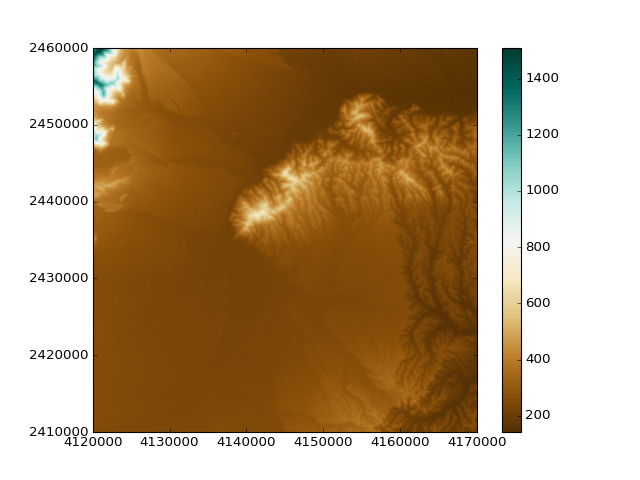

In [13]:
%matplotlib notebook


plt.imshow(wdata,extent=extent, cmap="BrBG")
plt.colorbar()

## 5.3.8 Reading partial dataset

band.ReadAsArray([xoff], [yoff], [win_xsize], [win_ysize], [buf_xsize], [buf_ysize], [buf_obj])

- xoff is the column to start reading at. The default value is 0.
- yoff is the row to start reading at. The default value is 0.
- win_xsize is the number of columns to read. The default is to read them all.
- win_ysize is the number of rows to read. The default is to read them all.
- buf_xsize is the number of columns in the output array. The default is to use the
- buf_ysize is the number of rows in the output array. The default is to use the win_ysize value. Data will be resampled if this value is different than win_ysize. 
- buf_obj is a NumPy array to put the data into instead of creating a new array. Data will be resampled, if needed, to fit into this array. Values will also be con- verted to the data type of this array.


### Reading One Row at a Time
Loop through the rows and read all pixels in that row during each iteration

In [12]:
for i in range(rows):
    wdata = band.ReadAsArray(0, i, cols, 1)
    # do something with the data here, before
    # reading the next row

### Reading Block by Block

In [13]:
blockSize = 64
for i in range(0, rows, blockSize):
    if i + blockSize < rows:
        numRows = blockSize

    else:
        numRows = (rows-i)
    for j in range(0, cols, blockSize):
        if j + blockSize < cols:
            numCols = blockSize
    else:
          numCols = (cols-j)
    wdata = band.ReadAsArray(j, i, numCols, numRows)
    # do something with the data here, before
    # reading the next block

## 5.3.9 Numpy Map Algebra 

When we use the GDAL ReadAsArray function, the data are put into a NumPy array.
Once rastred data are in array format the can be manipulated in multiple way using array (map) algebra and scipy functions.

 http://www.numpy.org
 
 <img align="left" style="padding-right:10px;" src="figures/gdal_4.png">
 

-3.40282306074e+38
(500, 500)
(52, 52)
0.0
1.0


<IPython.core.display.Javascript object>


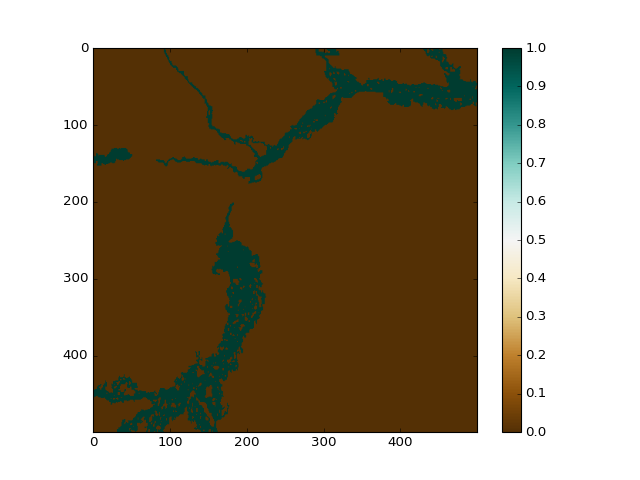

In [19]:
# insert a simple map algebra ex (read dem, red flooded area , compute water level)

workdir='data/Chap_5/'

floodareafn='floodMapEU_rp500y_Turim.tif'
#filename='out.tif'
dataset = gdal.Open(workdir+floodareafn,gdalconst.GA_ReadOnly) # open the dataset in read mode
band = dataset.GetRasterBand(1) # get the first band (Remember that band indices start at 1 instead of 0 )

geotransform = dataset.GetGeoTransform() # read the geotransform (origin coordinates and pixel sizes, along with rotation values)
projection = dataset.GetProjection() # read the proj info
flood = band.ReadAsArray(0, 0, cols, rows).astype("float32") #read all pixels as array

nodata = band.GetNoDataValue()
print nodata

floodmask = numpy.where(flood == nodata, 0.0, 1.0)
print numpy.shape(floodmask)
print numpy.shape(wdata)
print numpy.min(floodmask)
print numpy.max(floodmask)
%matplotlib notebook
#plt.figure()

plt.imshow(floodmask,cmap="BrBG")
plt.colorbar()

volume of water mc=460114580.082


<IPython.core.display.Javascript object>


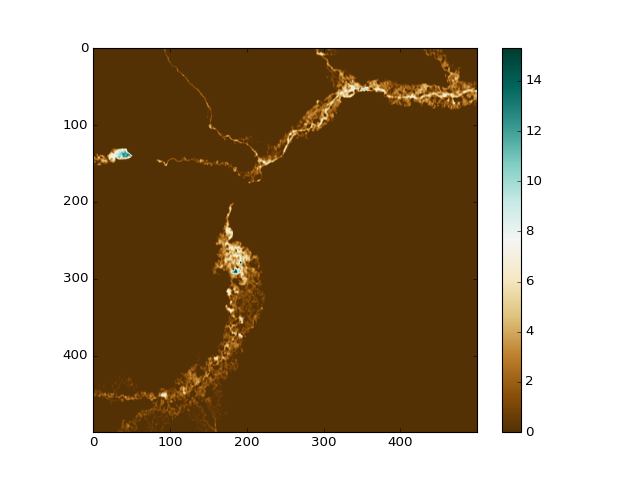

In [22]:
#compute Water Level Mask

WL=wdata*floodmask

#compute the volume of water displaced by flood event
pixelsize=geotransform[1]
volume=numpy.sum(WL)*pixelsize*pixelsize
print 'volume of water mc='+str(volume)

%matplotlib notebook
#plt.figure()

plt.imshow(WL,cmap="BrBG")
plt.colorbar()

## 5.3.10 Read Raster Function



In [32]:
import gdal,gdalconst
import numpy
import os, glob
import sys
import matplotlib.pyplot as plt
from osgeo import ogr, osr
import csv
#-------------------------------------------------------------------------------
#   GDAL2Numpy
#-------------------------------------------------------------------------------
def GDAL2Numpy(pathname):
    dataset = gdal.Open(pathname,gdalconst.GA_ReadOnly) # open the dataset in read mode
    band = dataset.GetRasterBand(1) # get the first band (Remember that band indices start at 1 instead of 0 )
    cols = dataset.RasterXSize # read number of colums
    rows = dataset.RasterYSize # read number of rows
    geotransform = dataset.GetGeoTransform() # read the geotransform (origin coordinates and pixel sizes, along with rotation values)
    projection = dataset.GetProjection() # read the proj info
    wdata = band.ReadAsArray(0, 0, cols, rows).astype("float32") #read all pixels as array
    nodata =band.GetNoDataValue()
    return (wdata,geotransform,projection,nodata) 
#-------------------------------------------------------------------------------

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## 5.3.11 Write Raster Function

In [33]:
#   Numpy2GTiff
#-------------------------------------------------------------------------------
def Numpy2GTiff(arr ,geotransform,projection,filename):
    if isinstance(arr,numpy.ndarray):
        rows,cols = arr.shape
        if rows>0 and cols>0:
            dtype = str(arr.dtype)
            if   dtype in ["uint8"]:
                fmt = gdal.GDT_Byte
            elif dtype in ["uint16"]:
                fmt = gdal.GDT_UInt16
            elif dtype in ["uint32"]:
                fmt = gdal.GDT_UInt32
            elif dtype in ["float32"]:
                fmt = gdal.GDT_Float32
            elif dtype in ["float64"]:
                fmt = gdal.GDT_Float64
            else:
                fmt = gdal.GDT_Float64

            driver = gdal.GetDriverByName("GTiff")
            dataset = driver.Create( filename, cols, rows, 1, fmt )
            if (geotransform!=None):
                dataset.SetGeoTransform( geotransform )
            if (projection!=None):
                dataset.SetProjection(projection)
            dataset.GetRasterBand(1).WriteArray( arr )
            dataset = None
            return filename
    return None

In [25]:
workdir='data/Chap_5/output/'

floodareamaskfn='mask_floodMapEU_rp500y_Turim.tif'
Numpy2GTiff(WL ,geotransform,projection,workdir+floodareamaskfn)

'data/Chap_5/output/mask_floodMapEU_rp500y_Turim.tif'

## 5.3.12 DEM and Spatial Processing - Slope, Aspect and Hillshade


 
<img align="left" style="padding-right:10px;" src="figures/gdal_5.png">


In [26]:
"""
Creates a shaded relief ASCII grid
from an ASCII DEM.  Also outputs
intermediate grids for slope and
aspect.
"""

# http://git.io/vYwUX

from linecache import getline
import numpy as np
import matplotlib.pyplot as plt

workdir='data/Chap_5/'
workoutdir='data/Chap_5/output/'
demname='eu_dem_v11_E40N20_Turim.tif'

# File name of TIFF digital elevation model
sourcefilename = workdir+demname
# File name of the slope grid
slopefilename = workoutdir+'slope.tiff'
# File name of the aspect grid
aspectfilename = workoutdir+'aspect.tiff'
# Output file name for shaded relief
shadedfilename = workoutdir+'shaded.tiff'

# Shaded elevation parameters
# Sun direction
azimuth = 315.0
# Sun angle
altitude = 45.0
# Elevation exageration
z = 1.0
# Resolution
scale = 1.0
# No data value for output
NODATA = -9999

# Needed for numpy conversions
deg2rad = 3.141592653589793 / 180.0
rad2deg = 180.0 / 3.141592653589793



# Load the dem into a numpy array

(arr, geotransform, projection,nodata)=(GDAL2Numpy(sourcefilename))
arr=numpy.float32(arr) #convert to 32-bit floating
xmin=geotransform[0] #get xmin origin
pixel_size=geotransform[1] #get pixel size x
ymax=geotransform[3] #get ymax origin
rows,cols=np.shape(arr) #get num cols and rows using numpy.shape function
ymin=ymax-pixel_size*rows # compute ymin
xres=pixel_size
yres=pixel_size

### Focal Analysis
Focal analyses use the pixels that surround the target pixel in order to calculate a value
For a given cell in the output, the value is calculated based on the correspond- ing cell and its neighbors in the input dataset. This is also called a moving window anal- ysis because you can think of it as “window” of cells centered on each pixel in turn. Once the value for the target pixel is calculated, the window moves to the next pixel.

<img align="left" style="padding-right:10px;" src="figures/focal.png">
<img align="left" style="padding-right:10px;" src="figures/focal_1.png">



In [27]:
# Exclude 2 pixels around the edges which are usually NODATA.
# Also set up structure for a 3x3 windows to process the slope
# throughout the grid
window = []
for row in range(3):
    for col in range(3):
        window.append(arr[row:(row + arr.shape[0] - 2),
                      col:(col + arr.shape[1] - 2)])
print numpy.ndim(window)
# Process each cell
x = ((z * window[0] + z * window[3] + z * window[3] + z * window[6]) -
     (z * window[2] + z * window[5] + z * window[5] + z * window[8])) / \
    (8.0 * xres * scale)

y = ((z * window[6] + z * window[7] + z * window[7] + z * window[8]) -
     (z * window[0] + z * window[1] + z * window[1] + z * window[2])) / \
     (8.0 * yres * scale)

# Calculate slope
slope = 90.0 - np.arctan(np.sqrt(x * x + y * y)) * rad2deg

# Calculate aspect
aspect = np.arctan2(x, y)

# Calculate the shaded relief
shaded = np.sin(altitude * deg2rad) * np.sin(slope * deg2rad) + \
     np.cos(altitude * deg2rad) * np.cos(slope * deg2rad) * \
     np.cos((azimuth - 90.0) * deg2rad - aspect)
shaded = shaded * 255


# Set no-data values
#for pane in window:
#    slope[pane == nd] = NODATA
#    aspect[pane == nd] = NODATA
#    shaded[pane == nd] = NODATA

# Open the output file, add the header, save the slope grid

Numpy2GTiff(slope ,geotransform,projection,slopefilename)
Numpy2GTiff(aspect ,geotransform,projection,aspectfilename)

Numpy2GTiff(shaded ,geotransform,projection,shadedfilename)

3


'data/Chap_5/output/shaded.tiff'

<IPython.core.display.Javascript object>


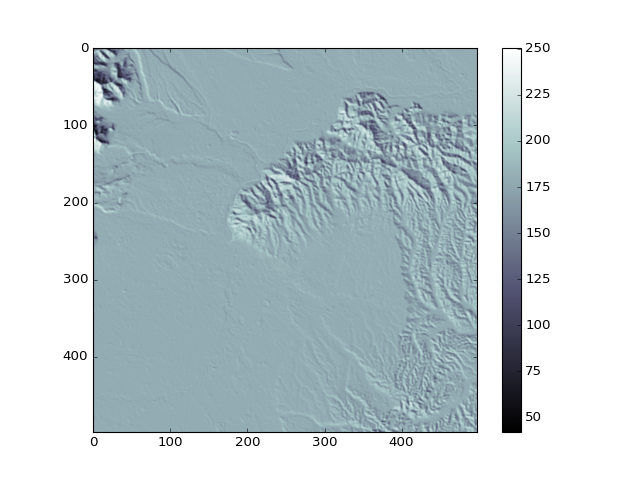

<IPython.core.display.Javascript object>


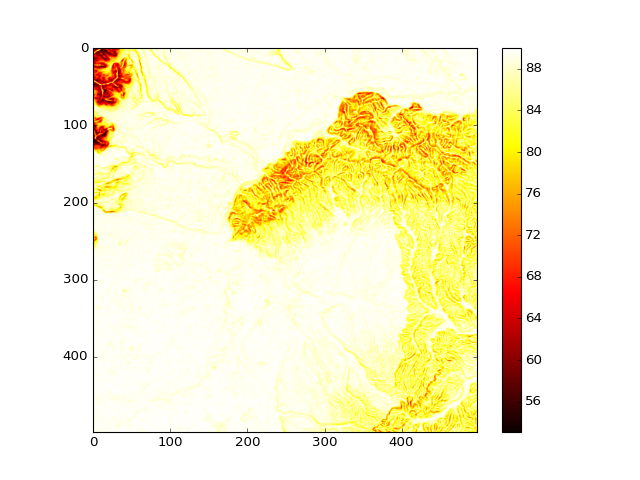

<IPython.core.display.Javascript object>


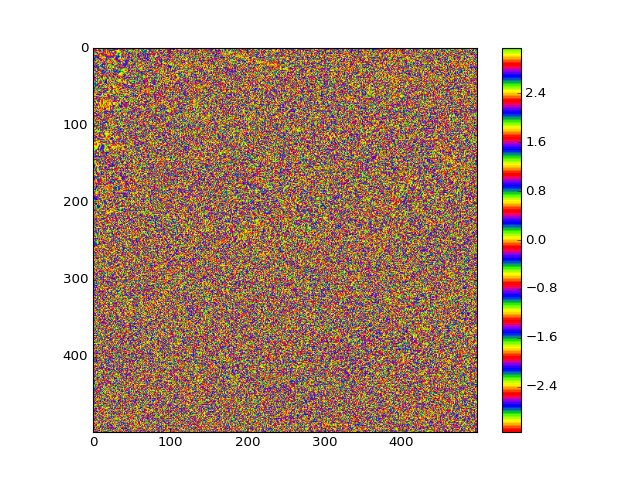

In [28]:
%matplotlib notebook
plt.figure()
plt.imshow(shaded,cmap="bone")
plt.colorbar()
plt.figure()
plt.imshow(slope,cmap="hot")
plt.colorbar()
plt.figure()
plt.imshow(aspect,cmap="prism")
plt.colorbar()
#http://matplotlib.org/examples/color/colormaps_reference.html

### Scipy for Focal Analysis
SciPy is a versatile Python module designed for scientific data analysis, and it uses NumPy arrays to store large amounts of data. It has submodules for interpolation, Fourier transforms, linear algebra, statistics, signal processing, and image processing, among others. The multidimensional image processing submodule contains filtering functions that can be used to perform the same operations you did with NumPy.

One advantage to using SciPy is that it will handle the edge problems for you by filling in extra cells around the edges so that the calculations can be performed on all cells.



<IPython.core.display.Javascript object>


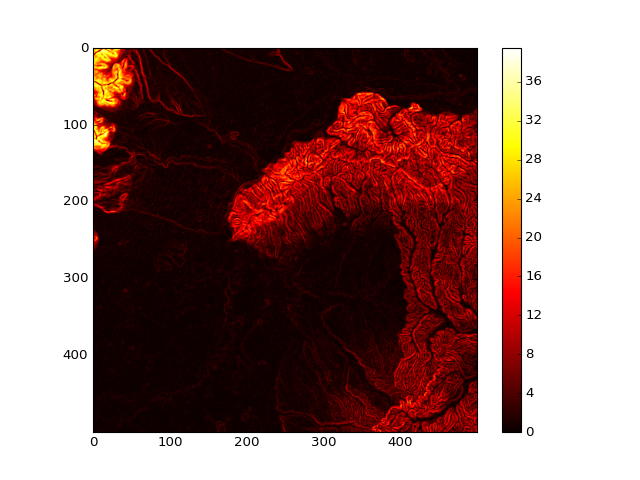

In [29]:
import os
import scipy.ndimage
from osgeo import gdal

workdir='data/Chap_5/'
workoutdir='data/Chap_5/output/'
demname='eu_dem_v11_E40N20_Turim.tif'
outdemname='smooth_eu_dem_v11_E40N20_Turim.tif'

def slope(data, cell_width, cell_height):
    """Calculates slope using a 3x3 window.
    data        - 1D array containing the 9 pixel values, starting
              in the upper left and going left to right and down
    cell_width  - pixel width in the same units as the data
    cell_height - pixel height in the same units as the data
    """
    rise = ((data[6] + (2 * data[7]) + data[8]) -
            (data[0] + (2 * data[1]) + data[2])) / \
           (8 * cell_height)
    run =  ((data[2] + (2 * data[5]) + data[8]) -
            (data[0] + (2 * data[3]) + data[6])) / \
           (8 * cell_width)
    dist = np.sqrt(np.square(rise) + np.square(run))
    return np.arctan(dist) * 180 / np.pi

in_ds = gdal.Open(workdir+demname)
in_band = in_ds.GetRasterBand(1)
in_data = in_band.ReadAsArray().astype(np.float32)
cell_width = in_ds.GetGeoTransform()[1]
cell_height = in_ds.GetGeoTransform()[5]
out_data = scipy.ndimage.filters.generic_filter(
    in_data, slope, size=3, mode='nearest',
    extra_arguments=(cell_width, cell_height))

Numpy2GTiff(out_data ,geotransform,projection,workoutdir+outdemname)
plt.figure()
plt.imshow(out_data,cmap="hot")
plt.colorbar()
del in_ds



## 5.3.13 Zonal Analysis

Zonal analyses work on cells that share a certain value, or belong to the same zone. The zones are usually defined by one raster and the analysis performed using values from a second one. 
For example, if you have a raster showing land cover categories such as forest, agriculture, etc, and a second raster showing flooded area (classified in 5 classes), you could use the flood maps categories as zones to determine the acreage of each land- cover type within each flood zone category.


In [35]:
import matplotlib.pyplot as plt
import gdal,gdalconst
import numpy
import scipy.stats
import os, glob
import sys

workdir='data/Chap_5/'
workoutdir='data/Chap_5/output/'
floodareafn='floodMapEU_rp500y_Turim.tif'
corinefn='g100_clc12_V18_5_Turim.tif'

floodmap=GDAL2Numpy(workdir+floodareafn)[0]
#print floodmap
nodata=GDAL2Numpy(workdir+floodareafn)[3]
print nodata
corinemap=GDAL2Numpy(workdir+corinefn)[0]


out_fn = workoutdir+'histogram.csv'

#classify flood mapin 5 classes


a=numpy.where(floodmap ==nodata, 0, floodmap)

b=numpy.where(a <0.0, 0, a)
c=numpy.where((b >0.0) & (b <=1.0), 1, b)

d=numpy.where((c >1.0) & (c <=2.0), 2, c)
e=numpy.where((d >2.0) & (d <=3.0), 3, d)
f=numpy.where((e >3.0) & (e <=5.0), 4, e)
floodclass=numpy.where((f >5.0) & (f <=20), 5, f)
#print floodclass



def get_bins(data):
    """Return bin edges for all unique values in data."""
    bins = numpy.unique(data)
    return numpy.append(bins, max(bins) + 1)

flood_data = floodclass.flatten()
flood_bins = get_bins(flood_data)
print "floodbins"
print flood_bins

corine_data = corinemap.flatten()
corine_bins = get_bins(corine_data)
print corine_bins


hist, eco_bins2, lc_bins2, bn = \
              scipy.stats.binned_statistic_2d(
                  flood_data, corine_data, corine_data, 'count',
                  [flood_bins, corine_bins])
hist = numpy.insert(hist, 0, corine_bins[:-1], 0)
row_labels = numpy.insert(flood_bins[:-1], 0, 0)
hist = numpy.insert(hist, 0, row_labels, 1)
numpy.savetxt(out_fn, hist, fmt='%1.0f', delimiter=',')




-3.40282306074e+38
floodbins
[ 0.  1.  2.  3.  4.  5.  6.]
[  1.   2.   3.   4.   6.   7.   8.   9.  10.  11.  12.  14.  15.  16.  18.
  20.  21.  23.  24.  25.  26.  29.  30.  32.  40.  41.  42.]


## 5.3.13 Image Classification

Landsat Thermal 8 Image (Band10): Every pixels has a reflectance value, 
As every pixel in this image has a reflectance value, it is information. Python can see these values and pick out features in the same way that we intuitively do by grouping the related pixel values. We can colorize the pixels based on their relation to each other to simplify the image and view the related features. This technique is called classification.

To introduce remote sensing classification, we'll just use the histogram to group the pixels with similar colors and intensities and see what we get

<IPython.core.display.Javascript object>


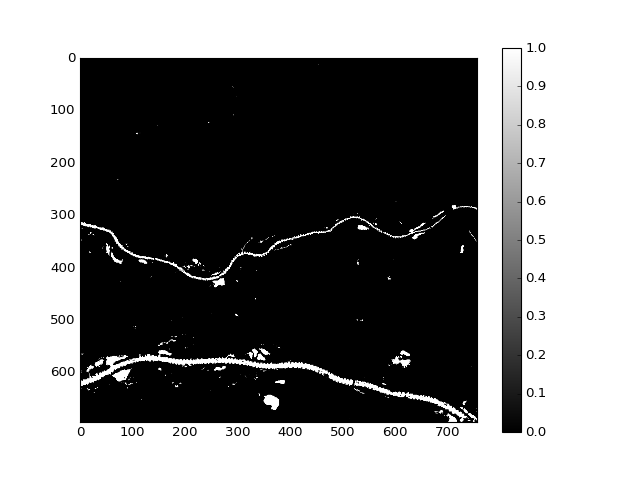

In [52]:
workdir='data/Chap_5/LandSat8/'
workoutdir='data/Chap_5/output/'
band3fn='LC81970242014109LGN00_sr_band3.tif'
band5fn='LC81970242014109LGN00_sr_band5.tif'
band6fn='LC81970242014109LGN00_sr_band6.tif'


(band3, geotransform, projection,nodata)=(GDAL2Numpy(workdir+band3fn))
(band5, geotransform, projection,nodata)=(GDAL2Numpy(workdir+band5fn))
(band6, geotransform, projection,nodata)=(GDAL2Numpy(workdir+band6fn))

NDWI=(band3-band5)/(band3+band5)
#MNDWI=(band3-band6)/(band3+band6)

NDWI=NDWI>0.2
MNDWI=MNDWI>0.2
%matplotlib notebook
plt.figure()
plt.imshow(NDWI,cmap="gray")
plt.colorbar()
#plt.figure()
#plt.imshow(MNDWI,cmap="hot")
#plt.colorbar()

## 5.3.14 Running TAUDEM exe in a Python script

In [28]:
import os, glob
import subprocess,shutil
def TAUDEM(workdir,batfilename):
    output = open(workdir+batfilename, 'w')
    output.writelines("rem #TAU calcola pitfilled dem"+'\n')
    output.writelines("mpiexec -n 8 PitRemove dem"+'\n')

    output.writelines("rem#TAU calcola flow direction"+'\n')
    output.writelines("mpiexec -n 8 D8FlowDir -fel demfel -p demp -sd8 demsd8"+'\n')

    output.writelines("rem#TAU calcola flow accumulation ignorando edge contamination"+'\n')
    output.writelines("mpiexec -n 8 Aread8 -p demp -ad8 demad8 -nc"+'\n')

    output.writelines("rem#TAU delinea raster con stream  network per bacini superiori a 16000 cell - 10 km2"+'\n')
    output.writelines("mpiexec -n 8 Threshold -ssa demad8 -src demsrc -thresh 16000"+'\n')

    output.writelines("rem#TAU delinea reticolo vettoriale "+'\n')
    output.writelines("mpiexec -n 8 Streamnet -fel demfel -p demp -ad8 demad8 -src demsrc -ord demord -tree demtree.dat -coord demcoord.dat -net demnet.shp -w demw"+'\n')
    output.close()
workdir='data/Chap_5/'
batfilename='taudem.bat'
TAUDEM(workdir,batfilename)
subprocess.call(workdir+batfilename)



OSError: [Errno 13] Permission denied

## 5.4 Working with Vector Data - Python/OGR 
The OGR Simple Features Library is part of the Geospatial Data Abstraction Library (GDAL), an extremely popular open source library for reading and writing spatial data.
The OGR portion of GDAL is the part that provides the ability to read and write many different vector data formats. OGR also allows you to :
- create and manipulate geometries; 
- edit attribute values; 
- filter vector data based on attribute values or spatial location; 
- and it also offers data analysis capabilities. 


### 5.4.1 Reading Vector Data with GDAL

We start with reading the points in a shape file 

#### Getting an OGR Data Driver
- Driver is an object that knows how to interact with a certain data type
- There are drivers for lots of things, such as ESRI Shapefiles, MapInfo files, TIGER files, certain kinds of text files, GML and KML http://www.gdal.org/ogr/ogr_formats.html


In [5]:
import ogr
driver = ogr.GetDriverByName('ESRI Shapefile')

#### Opening a OGR DataSource
• Driver objects have an Open() method that returns a DataSource object
• Notice the direction of the slashes in the filename



In [6]:
import ogr
import sys
from osgeo import ogr

driver = ogr.GetDriverByName("ESRI Shapefile")
# Open the data source for the examples.
filename = "data/Chap_5/shape/ne_110m_populated_places.shp"
ds = driver.Open(filename, 0)
#OR
ds = ogr.Open(filename, 0)
# If the second parameter isn’t provided it defaults to 0, which will open the file in read-only mode. 
# You could have passed 1 or True to open it in update, or edit, mode instead.


# make sure that the result of that operation isn’t equal to None, 
# because that would mean the data source couldn’t be opened
if ds is None:
    sys.exit('Could not open {0}.'.format(filename))
    


#### Getting a Data layer
- A datasource (ds) are made of one or more layers that hold the data, so after opening the data source you need to get the layer from it
- Some vector types can contain more than one layer
- Since shapefiles can only contain one layer, the layer index is always 0
- GetLayer() returns a Layer object

<img align="left" style="padding-right:10px;" src="figures/ogr_1.png">

In [7]:
layer = ds.GetLayer(0)

#### Looping Through Features
- The layer is a collection of features that you can iterate over with a for loop. Each time through the loop, the feature variable will be the next feature in the layer, and the loop will iterate over all features in the layer before stopping
- Layer objects have a GetNextFeature() method that returns a Feature object
-  GetNextFeature() returns the first feature when first invoked, then iterates through the features and returns None at the end

In [8]:
cnt = 0
feature = layer.GetNextFeature()
while feature:
    cnt = cnt + 1
    feature = layer.GetNextFeature() # returns a Feature object
    
print "Number of Features= " +str(layer.GetFeatureCount())
del ds


Number of Features= 243


#### Looping Through Features and Reading Geometries and Attributes

- Feature objects have a method called GetGeometryRef() which returns a Geometry object (could be Point, Polygon, etc)
- Point objects have GetX() and GetY() methods
- Feature objects have a method called GetField() which returns the value of that attribute field

In [11]:
# Open the data source for the examples.
driver = ogr.GetDriverByName("ESRI Shapefile")
filename = "data/Chap_5/shape/ne_110m_populated_places.shp"
ds = driver.Open(filename, 0)
layer = ds.GetLayer(0)

#The layer is a collection of features that you can iterate over with a for loop. 
#Each time through the loop, the feat variable will be the next feature in the layer, 
#and the loop will iterate over all features in the layer before stopping
i=0
x_list=[]
y_list=[]
for feature in layer:
    pt = feature.geometry() # reading geometry for each features and storing in variable pt
    x = pt.GetX() #getting X from pt and assign to X
    y = pt.GetY() #getting Y from pt and assign to y
    #name = feature.GetField('ID') 
    #The GetField function takes either an attribute name or index and returns the value of that field.
    name = feature.GetField(4) #get the attribute value
    x_list.append(x)
    y_list.append(y)
    print(name, x, y)
    i += 1
    if i == 10:
        break
#del ds
print x_list
print y_list
    

('Vatican City', 12.453386544971766, 41.903282179960115)
('San Marino', 12.441770157800141, 43.936095834768004)
('Vaduz', 9.516669472907267, 47.13372377429357)
('Lobamba', 31.19999710971274, -26.466667461352472)
('Luxembourg', 6.130002806227083, 49.611660379121076)
('Palikir', 158.1499743237623, 6.916643696007725)
('Majuro', 171.38000017574655, 7.103004311216239)
('Funafuti', 179.21664709402887, -8.516651999041073)
('Melekeok', 134.62654846699218, 7.487396172977981)
('Bir Lehlou', -9.652522218250112, 26.119166685993378)
[12.453386544971766, 12.441770157800141, 9.516669472907267, 31.19999710971274, 6.130002806227083, 158.1499743237623, 171.38000017574655, 179.21664709402887, 134.62654846699218, -9.652522218250112]
[41.903282179960115, 43.936095834768004, 47.13372377429357, -26.466667461352472, 49.611660379121076, 6.916643696007725, 7.103004311216239, -8.516651999041073, 7.487396172977981, 26.119166685993378]


Print the SR

In [12]:
print(ds.GetLayer().GetSpatialRef())

GEOGCS["GCS_WGS_1984",
    DATUM["WGS_1984",
        SPHEROID["WGS_84",6378137.0,298.257223563]],
    PRIMEM["Greenwich",0.0],
    UNIT["Degree",0.017453292519943295]]


Reproject Points

In [13]:
import pyproj
utm_proj = pyproj.Proj('+proj=merc +lon_0=0 +k=1 +x_0=0 +y_0=0 +a=6378137 +b=6378137 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs')
points=len(x_list)
xlistnew=[]
ylistnew=[]
for  p in range (0,points-1):
    xlistnew.append(utm_proj(x_list[p],y_list[p])[0])
    ylistnew.append(utm_proj(x_list[p],y_list[p])[1])
print xlistnew
print ylistnew

[1386304.6488380614, 1385011.5185332587, 1059390.7997719282, 3473167.791004829, 682388.790950537, 17605174.610690508, 19077934.35171524, 19950305.896185104, 14986558.822601534]
[5146502.575862345, 5455558.186449198, 5963928.57622693, -3056995.457303666, 6379291.915456844, 771834.1794486967, 792735.9936791514, -951580.0268212128, 835875.594339321]


### Visualize Vector Data

In [14]:
from bokeh.io import output_notebook, show
output_notebook()

from bokeh.plotting import figure
from bokeh.tile_providers import WMTSTileSource

WORLD = x_range,y_range = ((0,10453304), (-9000000,8455972))

fig = figure(tools='pan, wheel_zoom', x_range=x_range, y_range=y_range)
fig.axis.visible = False
url = 'http://a.basemaps.cartocdn.com/light_all/{Z}/{X}/{Y}.png'
attribution = "Map tiles by Carto, under CC BY 3.0. Data by OpenStreetMap, under ODbL"

fig.add_tile(WMTSTileSource(url=url, attribution=attribution))

fig.circle(xlistnew, ylistnew,fill_color='blue', size=10)
show(fig)

Loading BokehJS ...

#### Accessing specific features

- Selecting feature by **FID** feature IDs

In [ ]:
driver = ogr.GetDriverByName("ESRI Shapefile")
filename = "data/Chap_5/shape/ne_110m_populated_places.shp"
ds = driver.Open(filename, 0)
layer = ds.GetLayer(0)

selectedfeature=layer.GetFeature(7)
pt = selectedfeature.geometry() # reading geometry for each features and storing in variable pt
x = pt.GetX() #getting X from pt and assign to X
y = pt.GetY() #getting Y from pt and assign to y
name = selectedfeature.GetField(0)
print(name, x, y)

In [ ]:
#go to next feature
feature = layer.GetNextFeature()
pt = feature.geometry() # reading geometry for each features and storing in variable pt
x = pt.GetX() #getting X from pt and assign to X
y = pt.GetY() #getting Y from pt and assign to y
name = feature.GetField(0)
print(name, x, y)

#### Reset pointer-reading 
ResetReading() function, which sets the current feature pointer to a loca- tion before the first feature, similar to when you first opened the layer.
Now you can start over in looping the layer
<img align="left" style="padding-right:10px;" src="figures/ogr_2.png">

In [ ]:
layer.ResetReading()

#### Getting Metadata

Sometimes you also need to know general information about a dataset, such as the number of features, spatial extent, geometry type, spatial reference system, or the names and types of attribute fields.
For example, say you want to display your data on top of a Google map. You need to make sure that your data use the same spatial refer- ence system as Google, and you need to know the spatial extent so that you can have your map zoom to the correct part of the world.


Geom Type Constant
<img align="left" style="padding-right:10px;" src="figures/ogr_3.png">

In [ ]:
print layer.GetFeatureCount()

print layer.GetExtent()

print layer.GetGeomType()

print(layer.GetGeomType() == ogr.wkbPoint)
print(layer.GetGeomType() == ogr.wkbPolygon)

print(layer.GetSpatialRef()) #Spatial Reference in WKT format

for field in layer.schema:
    print(field.name, field.GetTypeName()) 

### 5.4.2 Writing Vector Data

In [ ]:
import sys
from osgeo import ogr
ds = ogr.Open(r'data/Chap_5/shape/', 1)  #Open folder data source for writing
if ds is None:
    sys.exit('Could not open folder.')
in_lyr = ds.GetLayer('ne_110m_populated_places') #Get input shapefile
if ds.GetLayer('capital_cities'): #Delete layer if it exists
    ds.DeleteLayer('capital_cities')
    

#### CreateLayer(name, [srs], [geom_type], [options])
- name is the name of the layer to create.
- srs is the spatial reference system that the layer will use. The default is None,
- meaning that no spatial reference system will be assigned.
- geom_type is a geometry type constant from table 3.1 that specifies the type of geometry the layer will hold. The default is wkbUnknown.
- options is an optional list of layer-creation options, which only applies to cer- tain vector format types.

In [ ]:
out_lyr = ds.CreateLayer('capital_cities',
                         in_lyr.GetSpatialRef(),
                         ogr.wkbPoint) #Create a point layer
out_lyr.CreateFields(in_lyr.schema) #create field in out_lyr same as in in_layer

#### Create Empty Feature
Now, to add a feature to a layer, you need to create a dummy feature that you add the geometry and attributes to, and then you insert that into the layer. 
The next step is to create this blank feature. 
Creating a feature requires a feature definition that contains information about the geometry type and all of the attribute fields, and this is used to create an empty feature with the same fields and geometry type. 
You need to get the feature definition from the layer you plan to add features to, but you must do it after you’ve added, deleted, or updated any fields. If you get the feature definition first, and then change the fields in any way, the definition will be out of date.

In [ ]:

out_defn = out_lyr.GetLayerDefn() # create geometry type
print out_defn

out_feat = ogr.Feature(out_defn) #create blank feature
for in_feat in in_lyr:#Copy geometry and attributes
 if in_feat.GetField('FEATURECLA') == 'Admin-0 capital':
    geom = in_feat.geometry()
    out_feat.SetGeometry(geom)
    for i in range(in_feat.GetFieldCount()): # copy all fields data
        value = in_feat.GetField(i)
        out_feat.SetField(i, value)
    out_lyr.CreateFeature(out_feat) #insert new feature
del ds 
# delete the ds variable at the end of the script, 
# which forces the files to close and all of your edits to be written to disk

#### creating a new data source
- most important part is that you use the correct driver
- get the driver from an existing dataset

In [ ]:
# get driver from an existing datase
ds = ogr.Open(r'data/Chap_5/shape/ne_110m_populated_places.shp')
driver = ds.GetDriver()

# set up the shapefile driver
shape_driver = ogr.GetDriverByName('ESRI Shapefile')
shp_fn='data/Chap_5/shape/'


# create the new data source
shp_ds = shape_driver.CreateDataSource(shp_fn+'newpointlayer.shp')
if shp_ds is None:
    sys.exit('Could not create {0}.'.format(shp_fn))
  
# create the layer    
out_lyr = shp_ds.CreateLayer('newpointlayer',geom_type=ogr.wkbPoint)    

# Add the fields we're interested in
## Field X
coord_fld = ogr.FieldDefn('X', ogr.OFTReal)
coord_fld.SetWidth(8)
coord_fld.SetPrecision(3)
out_lyr.CreateField(coord_fld)
## Field Y
coord_fld.SetName('Y')
out_lyr.CreateField(coord_fld)
## Field Name
field_name = ogr.FieldDefn("Name", ogr.OFTString)
field_name.SetWidth(24)
out_lyr.CreateField(field_name)

# create the new feature
out_feat = ogr.Feature(out_lyr.GetLayerDefn())
# create point geometry
point=ogr.Geometry(ogr.wkbPoint) #define point geometry

<img align="left" style="padding-right:10px;" src="figures/ogr_4.png">

In [ ]:
# define the coordinates
point.SetPoint(0,10,10)
featureIndex = 0

# Set the feature geometry using the point
out_feat.SetGeometry(point)
out_feat.SetFID(featureIndex)


# Set the attributes using the values from the delimited text file
x, y = point.GetX(), point.GetY() # get X,Y
print x,y
out_feat.SetField('X', x)
out_feat.SetField('Y', y)
out_feat.SetField('Name', 'test')

# Create the feature in the layer (shapefile)
out_lyr.CreateFeature(out_feat)

# Save and close the data source
out_feat.Destroy()
shp_ds.Destroy() 

### 5.4.3 Filter - Attribute and Spatial
■ Efficiently selecting features using attribute values
■ Using spatial location to select features

#### Attribute Filter
If you need to limit the features by values contained in one or more attribute fields, then you want an attribute filter.

In [ ]:
import ogr
import sys
from osgeo import ogr

driver = ogr.GetDriverByName("ESRI Shapefile")
filename = "data/Chap_5/shape/ne_110m_populated_places.shp"
ds = ogr.Open(filename, 0)
lyr = ds.GetLayer(0)
lyr.SetAttributeFilter('ELEVATION > 500')
print lyr.GetFeatureCount()


lyr.SetAttributeFilter(None) # reset filter

#### Spatial Filter
Spatial filters let you limit the features by spatial extent rather than attribute value. These filters can be used to select features within another geometry or inside a bound- ing box

In [ ]:
lyr.SetSpatialFilterRect(110, -50, 160, 10)
print lyr.GetFeatureCount()

#### OGR Operation

<img style="width: 800px;" src="figures/ogr_5.jpg">

** Example: Find the number of houses that are intersected by flood area with RT=500 yr**

<img style="width: 800px;" src="figures/intersection.png">

In [23]:
from osgeo import ogr

# read the water flood layer
file1 ="data/Chap_5/shape/dissolve_floodMapEU_rp500y_Turim.shp"
file2="data/Chap_5/shape/civici_10000_geo_3035.shp"
dataset1 = ogr.Open(file1) # prendere shape water flood extent
layer1 = dataset1.GetLayer(0)


#read the city building layer
dataset2 = ogr.Open(file2)
layer2 = dataset2.GetLayer(0)



i=0
for feature1 in layer1:
    
    counter=0
    water_geom = feature1.GetGeometryRef()
    for nola_feat in layer2:
        nola_geom =nola_feat.GetGeometryRef()
        if nola_geom.Intersect(water_geom):
            counter = counter+1

    print "number of intersections is",counter

del dataset1
del dataset2




1
number of intersections is 599


<!--NAVIGATION-->
< [5_Geoprocessing_Python_GDAL](5_Geoprocessing_Python_GDAL.ipynb) | [Contents](Index.ipynb) | [6_Hazard_Mapping Python_GDAL](6_Hazard_Mapping_Python_GDAL.ipynb) >